# EDA

In [42]:
import pandas as pd
# file path to data file
file_path = "../src/taxipred/data/taxi_trip_pricing.csv"
# read in the data in a DataFrame
try:
    df = pd.read_csv(file_path)
    print("File read with no problems")
except FileNotFoundError:
    print(f"Could not fins the file in serach path: {file_path}")
    print("Double check that the file path is correct.")



File read with no problems


In [43]:
# print the first 5 rows
print(df.head())

   Trip_Distance_km Time_of_Day  ... Trip_Duration_Minutes  Trip_Price
0             19.35     Morning  ...                 53.82     36.2624
1             47.59   Afternoon  ...                 40.57         NaN
2             36.87     Evening  ...                 37.27     52.9032
3             30.33     Evening  ...                116.81     36.4698
4               NaN     Evening  ...                 22.64     15.6180

[5 rows x 11 columns]


In [44]:
# technical overview of columns, data types and nulls
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB
None


In [45]:
# overview of how many values that is missing per column.
print(df.isnull().sum())

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64


In [46]:
# statistic information about the numerical columns
print(df.describe())

       Trip_Distance_km  Passenger_Count  ...  Trip_Duration_Minutes  Trip_Price
count        950.000000       950.000000  ...             950.000000  951.000000
mean          27.070547         2.476842  ...              62.118116   56.874773
std           19.905300         1.102249  ...              32.154406   40.469791
min            1.230000         1.000000  ...               5.010000    6.126900
25%           12.632500         1.250000  ...              35.882500   33.742650
50%           25.830000         2.000000  ...              61.860000   50.074500
75%           38.405000         3.000000  ...              89.055000   69.099350
max          146.067047         4.000000  ...             119.840000  332.043689

[8 rows x 7 columns]


#### Save columns were Trip_Price is not defined to a new csv file

In [47]:
df_for_prediction = df[df["Trip_Price"].isnull()].copy()
df_for_prediction.to_csv("../src/taxipred/data/taxi_trips_for_prediction.csv", index = False)
print(f"Saved {len(df_for_prediction)} rows without price to a new file for future use.")

Saved 49 rows without price to a new file for future use.


# Data cleaning

In [48]:
df_cleaned = df.copy()
# clean the data from the columns we just moved to a new file so we dont leak the data.
df_cleaned.dropna(subset = ["Trip_Price"], inplace = True)

df_cleaned.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028


In [49]:
# add a mean value for all the other numerical columns that contains null values.
for col in ["Trip_Distance_km", "Passenger_Count", "Base_Fare", "Per_Km_Rate", "Per_Minute_Rate", "Trip_Duration_Minutes"]:
    if df_cleaned[col].isnull().any():
        median_value = df_cleaned[col].median() # we use median instead of mean to better handle outliers.
        df_cleaned[col].fillna(median_value, inplace = True)
        print(f"Filled the missing values in {col} with the mean value {median_value:.2f}")

Filled the missing values in Trip_Distance_km with the mean value 25.87
Filled the missing values in Passenger_Count with the mean value 2.00
Filled the missing values in Base_Fare with the mean value 3.51
Filled the missing values in Per_Km_Rate with the mean value 1.22
Filled the missing values in Per_Minute_Rate with the mean value 0.29
Filled the missing values in Trip_Duration_Minutes with the mean value 61.57


C:\Users\edwin\AppData\Local\Temp\ipykernel_25844\351062758.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_value, inplace = True)
C:\Users\edwin\AppData\Local\Temp\ipykernel_25844\351062758.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [50]:
# add data to categorical columns that had null values
categorical_cols = ["Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Weather"]
for col in categorical_cols:
    if df_cleaned[col].isnull().any():
        mode_value = df_cleaned[col].mode()[0]
        df_cleaned[col].fillna(mode_value, inplace=True)
        print(f"Filled in missing values in '{col}' with the common value '{mode_value}'")

Filled in missing values in 'Time_of_Day' with the common value 'Afternoon'
Filled in missing values in 'Day_of_Week' with the common value 'Weekday'
Filled in missing values in 'Traffic_Conditions' with the common value 'Low'
Filled in missing values in 'Weather' with the common value 'Clear'


C:\Users\edwin\AppData\Local\Temp\ipykernel_25844\3629767928.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(mode_value, inplace=True)


In [51]:
print("Result after cleaning:")
print(df_cleaned.isnull().sum())

Result after cleaning:
Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64


#### Indentify outliers with scatterplot

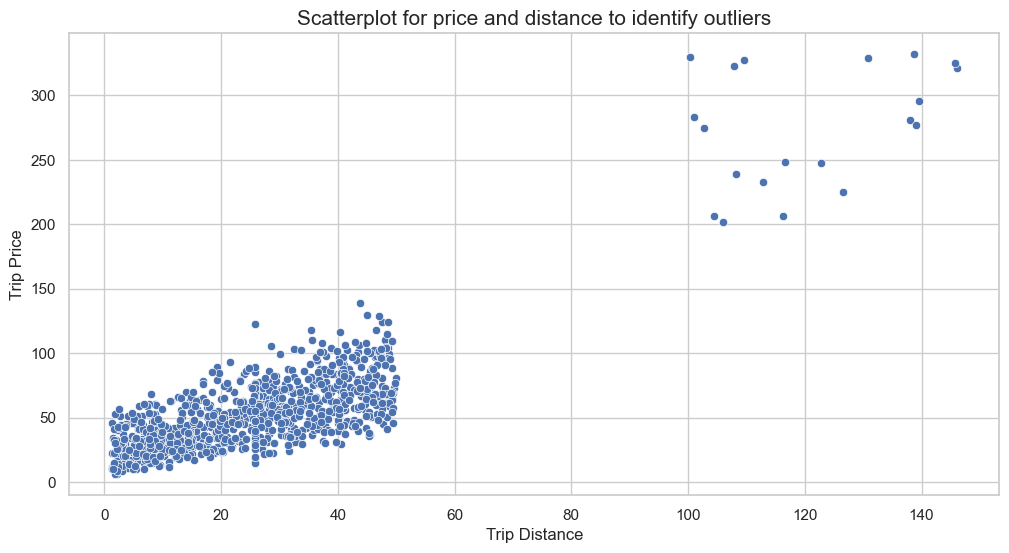

In [52]:
# import visualization libraries seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# set a theme for all graphs
sns.set_theme(style = "whitegrid")

# Scatterplot for Trip_Price and Trip_Distance_Km
plt.figure(figsize = (12, 6))
sns.scatterplot(x = df_cleaned["Trip_Distance_km"], y = df_cleaned["Trip_Price"])
plt.title("Scatterplot for price and distance to identify outliers", fontsize = 15)
plt.ylabel("Trip Price", fontsize = 12)
plt.xlabel("Trip Distance", fontsize = 12)
plt.show()

#### Separate outliers from data

In [53]:
rows_before = len(df_cleaned)
print(f"Number of rows before removing outliers: {rows_before}")

Number of rows before removing outliers: 951


In [54]:
df_no_outliers = df_cleaned[df_cleaned["Trip_Price"] < 100].copy()
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       892 non-null    float64
 1   Time_of_Day            892 non-null    object 
 2   Day_of_Week            892 non-null    object 
 3   Passenger_Count        892 non-null    float64
 4   Traffic_Conditions     892 non-null    object 
 5   Weather                892 non-null    object 
 6   Base_Fare              892 non-null    float64
 7   Per_Km_Rate            892 non-null    float64
 8   Per_Minute_Rate        892 non-null    float64
 9   Trip_Duration_Minutes  892 non-null    float64
 10  Trip_Price             892 non-null    float64
dtypes: float64(7), object(4)
memory usage: 83.6+ KB


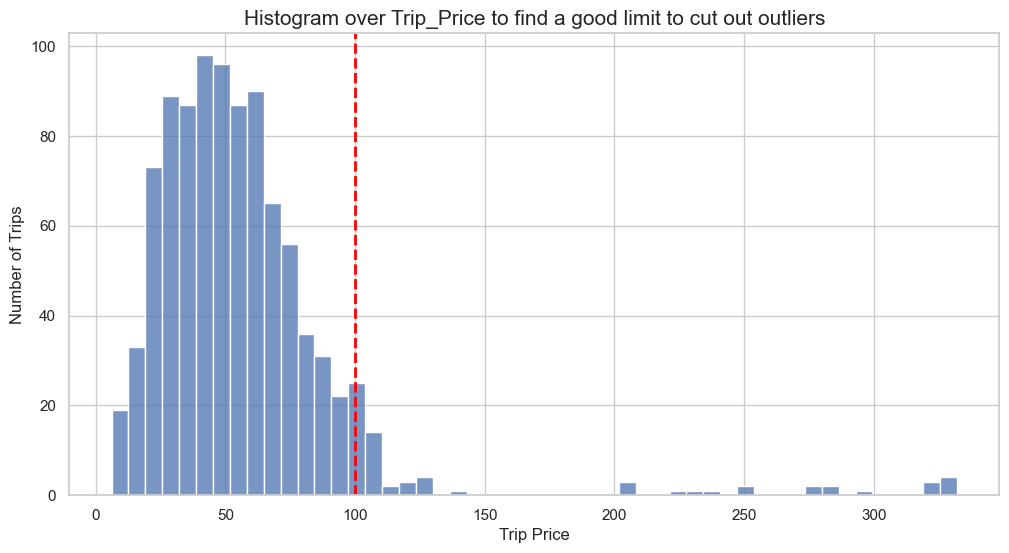

In [55]:
plt.figure(figsize = (12,6))
sns.histplot(df_cleaned["Trip_Price"], bins = 50)
plt.title("Histogram over Trip_Price to find a good limit to cut out outliers", fontsize=15)
plt.xlabel("Trip Price", fontsize = 12)
plt.ylabel("Number of Trips", fontsize = 12)

plt.axvline(100, color = "red", linestyle= "--", linewidth=2)
plt.show()

In [56]:
# correct boxplot with the right outliers removed that we learned from the plot above.
df_no_outliers = df_cleaned[df_cleaned["Trip_Price"] < 150].copy()

rows_after = len(df_no_outliers)
print(f"Number of rows after we removed the correct outliers")
print(f"We removed {rows_before - rows_after} outliers.")


Number of rows after we removed the correct outliers
We removed 20 outliers.


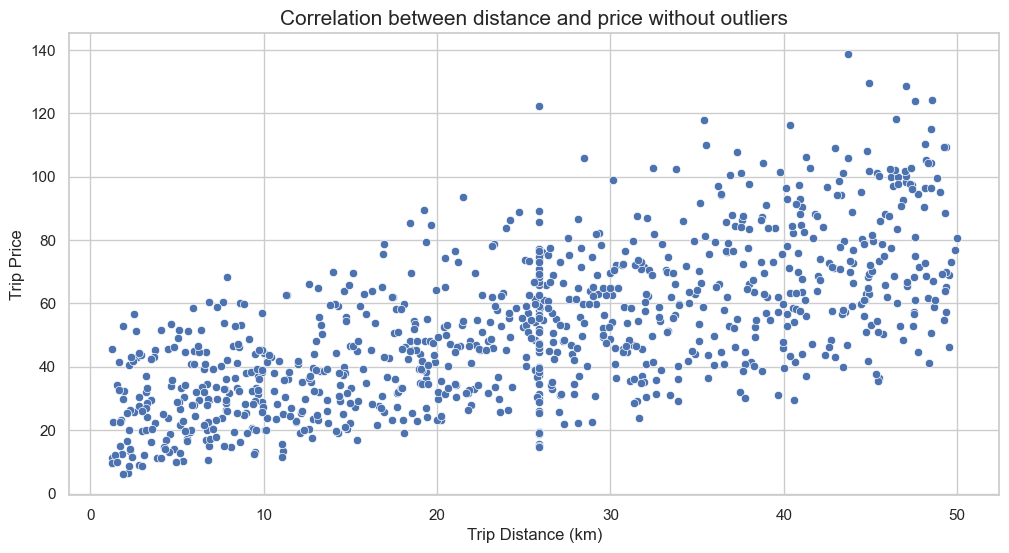

In [57]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = df_no_outliers["Trip_Distance_km"], y = df_no_outliers["Trip_Price"])
plt.title("Correlation between distance and price without outliers", fontsize = 15)
plt.xlabel("Trip Distance (km)", fontsize = 12)
plt.ylabel("Trip Price", fontsize = 12)
plt.show()

# Preparations for modeling

In [58]:
# turn categorical values to numerical values

df_processed = pd.get_dummies(
    df_no_outliers,
    columns=["Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Weather"],
    drop_first=True,
)

print("New column values:")
df_processed.head()

"""
The new rows created could be a little misleading on why it doesnt have all columns.
Lets take the Traffic_Conditions columns as an example. If we only use two columns for low and medium,
we dont need to add high traffic as well since it will only give redundant information.
If we know that both low and medium traffic condition is false for a certain trip, 
the model will automatically assume the right answer for that trip is high. 
This is a standard method called "multicollinearity". 
It's just a nicer word for not giving the model redundant information. 
And the model gets smarter and more effective when it doesnt have extra columns that just repeat 
information already available in other columns!

"""

New column values:


'\nThe new rows created could be a little misleading on why it doesnt have all columns.\nLets take the Traffic_Conditions columns as an example. If we only use two columns for low and medium,\nwe dont need to add high traffic as well since it will only give redundant information.\nIf we know that both low and medium traffic condition is false for a certain trip, \nthe model will automatically assume the right answer for that trip is high. \nThis is a standard method called "multicollinearity". \nIt\'s just a nicer word for not giving the model redundant information. \nAnd the model gets smarter and more effective when it doesnt have extra columns that just repeat \ninformation already available in other columns!\n\n'

#### train|test split

In [59]:
# import ttt from scikit-learn
from sklearn.model_selection import train_test_split

# define "X". this is all the data except the column we want to predict. axis=1 means we remove the Trip_Price column
X = df_processed.drop("Trip_Price", axis = 1)

# define "y". This is ONLY the part we want to predict.
y = df_processed["Trip_Price"]
# test_size specifies that 20%(0.2) is going to be our test data.
# random_state is like a seed that we are choosing to always get the same random split every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# print the shape (rows, columns) of the new sets to confirm that everyhing is correct
print(f"Shape of training data (X_train): {X_train.shape}")
print(f"Shape of test data (X_test): {X_test.shape}")
print(f"Shape of training labels (y_train): {y_train.shape}")
print(f"Shape of test labels (y_test): {y_test.shape}")

Shape of training data (X_train): (744, 14)
Shape of test data (X_test): (187, 14)
Shape of training labels (y_train): (744,)
Shape of test labels (y_test): (187,)


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
import numpy as np
X = df_no_outliers.drop("Trip_Price", axis = 1)
y = df_no_outliers["Trip_Price"]

X_processed = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.2, random_state = 42)

model = LinearRegression()

print("Training the model...")
model.fit(X_train, y_train)
print("Model training complete!")

print("Evaluating the model...")
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"The model's average error (RMSE): ${rmse:.2f}")

comparison_df = pd.DataFrame({"Actual Price": y_test, "Predicted Price": predictions})
print("A few examples of predicitons vs actual prices:")
print(comparison_df.head(35))

Training the model...
Model training complete!
Evaluating the model...
The model's average error (RMSE): $8.43
A few examples of predicitons vs actual prices:
     Actual Price  Predicted Price
891       43.1998        64.796792
77        18.8626        14.394419
682       20.3509        19.959439
547       29.2693        35.724236
906       67.7360        58.389069
104       73.4155        71.499660
505       25.5304        20.810012
93       105.9418        93.193784
571       72.9188        74.070188
384       87.8962        75.319292
690       75.7144        67.139992
487       54.4237        54.525250
252       48.4081        57.063224
475       72.9690        76.636617
256       92.6832        78.694640
292       56.0596        57.351565
172       54.6218        53.872000
484       56.3456        53.859202
443       34.5791        43.823395
805       76.4647        76.911801
717      104.1555        98.727961
360       23.1614        19.951511
402       36.7152        41.491578
3

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("Training the RandomForest model...")
rf_model.fit(X_train, y_train)
print("Model training complete!")

print("Evaluating the RandomForest model...")
rf_predictions = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

print(f"Linear Regerssion RMSE:     $8.43")
print(f"Random Forest RMSE:         ${rf_rmse:.2f}")

rf_comparison_df = pd.DataFrame({"Actual Prise": y_test, "Predicted Pride": rf_predictions})
print("A few examples of RandomForest predictions vs actual prices:")
print(rf_comparison_df.head(15))

Training the RandomForest model...
Model training complete!
Evaluating the RandomForest model...
Linear Regerssion RMSE:     $8.43
Random Forest RMSE:         $7.31
A few examples of RandomForest predictions vs actual prices:
     Actual Prise  Predicted Pride
891       43.1998        56.457391
77        18.8626        16.168891
682       20.3509        19.775671
547       29.2693        34.463756
906       67.7360        77.590844
104       73.4155        70.610933
505       25.5304        29.612115
93       105.9418        86.240195
571       72.9188        71.640267
384       87.8962        90.041809
690       75.7144        68.798862
487       54.4237        43.769219
252       48.4081        62.845529
475       72.9690        67.078094
256       92.6832        92.814350


### joblib

In [65]:
import joblib

final_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print ("Training the final model on all data....")
final_model.fit(X_processed, y)
print("Final model training complete!")

joblib.dump(final_model, "../src/taxipred/backend/models/random_forest_final.joblib")

print(f"Final model saved successfully!")

Training the final model on all data....
Final model training complete!
Final model saved successfully!
